## Week 2 - Machine Learning as Optimization

2.3. You are given the scatter of points (x,y) = (1, 1.5), (4, 3.5), (7, 9), (10, 8). Set up an optimization problem to perform linear regression by hand along the lines of the previous problem by defining theta, etc.  Then perform hand calculations to implement linear regression using gradient descent, and report the optimal value of theta that you obtain and what that means. Again, list all the steps - 1, 2,...etc. without omitting any details. But you only need to show 2 iterations for gradient descent calculation.

2.4. Develop a Notebook tutorial to explain the process using the example in step 2.3 above, performing the optimization numerically.

Setup: This cell initializes our data and defines the gradient descent logic for the simplified hypothesis $h_{\theta}(x) = \theta x$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points: (1, 1.5), (4, 3.5), (7, 9), (10, 8)
x = np.array([1, 4, 7, 10])
y = np.array([1.5, 3.5, 9, 8])
m = len(x)

def run_gradient_descent(x, y, alpha, iterations=2):
    theta = 0.0
    history = [theta]
    
    print(f"Starting Gradient Descent with alpha = {alpha}")
    print("-" * 30)
    
    for i in range(iterations):
        # 1. Calculate Predictions
        h = theta * x
        
        # 2. Calculate Errors
        errors = h - y
        
        # 3. Calculate Gradient (partial derivative)
        # dJ/d_theta = (1/m) * sum(errors * x)
        gradient = np.sum(errors * x) / m
        
        # 4. Update Theta
        theta = theta - (alpha * gradient)
        history.append(theta)
        
        print(f"Iteration {i+1}:")
        print(f"  Gradient: {gradient:.4f}")
        print(f"  New Theta: {theta:.4f}")
        
    return theta, history

# Run the 0.05 version we just calculated
final_theta, theta_history = run_gradient_descent(x, y, alpha=0.01, iterations=2)

Starting Gradient Descent with alpha = 0.01
------------------------------
Iteration 1:
  Gradient: -39.6250
  New Theta: 0.3962
Iteration 2:
  Gradient: -23.1806
  New Theta: 0.6281


Visualization: This cell generates a plot to show how the line changed over the two iterations compared to the actual data points

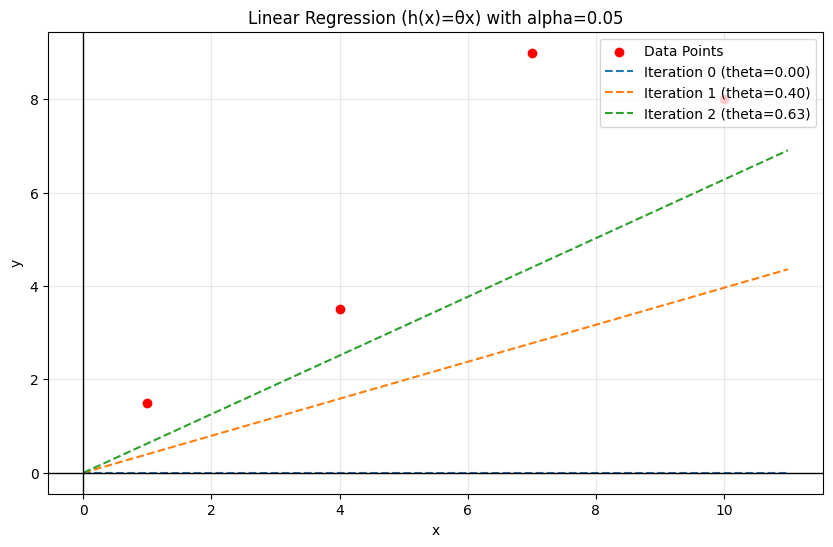

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data Points', zorder=5)

# Plot the lines from the history
x_vals = np.linspace(0, 11, 100)
for i, t in enumerate(theta_history):
    plt.plot(x_vals, t * x_vals, label=f'Iteration {i} (theta={t:.2f})', linestyle='--')

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title(f'Linear Regression (h(x)=θx) with alpha=0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()